In [ ]:
# API
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download dataset
!kaggle datasets download -d alessiocorrado99/animals10
!unzip -q animals10.zip -d animals10


Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0


In [ ]:
# proses dan load data
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Hapus folder 'notebook.bib' jika ada
import shutil
bib_file = 'animals10/notebooks.bib'
if os.path.exists(bib_file):
    os.remove(bib_file)

# Path ke dataset
data_dir = 'animals10/raw-img'

# Buat ImageDataGenerator untuk training & testing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# TRAINING

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.2759 - loss: 2.0468 - val_accuracy: 0.4625 - val_loss: 1.5508
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.4386 - loss: 1.6090 - val_accuracy: 0.5185 - val_loss: 1.3721
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.5036 - loss: 1.4368 - val_accuracy: 0.5902 - val_loss: 1.2338
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.5500 - loss: 1.2826 - val_accuracy: 0.6047 - val_loss: 1.1812
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.5859 - loss: 1.1660 - val_accuracy: 0.6198 - val_loss: 1.1073
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.6236 - loss: 1.0681 - val_accuracy: 0.6281 - val_loss: 1.0997
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.6573 - loss: 0.9754 - val_accuracy: 0.6433 - val_loss: 1.0973
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.6827 - loss: 0.9020 - val_accurac

164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


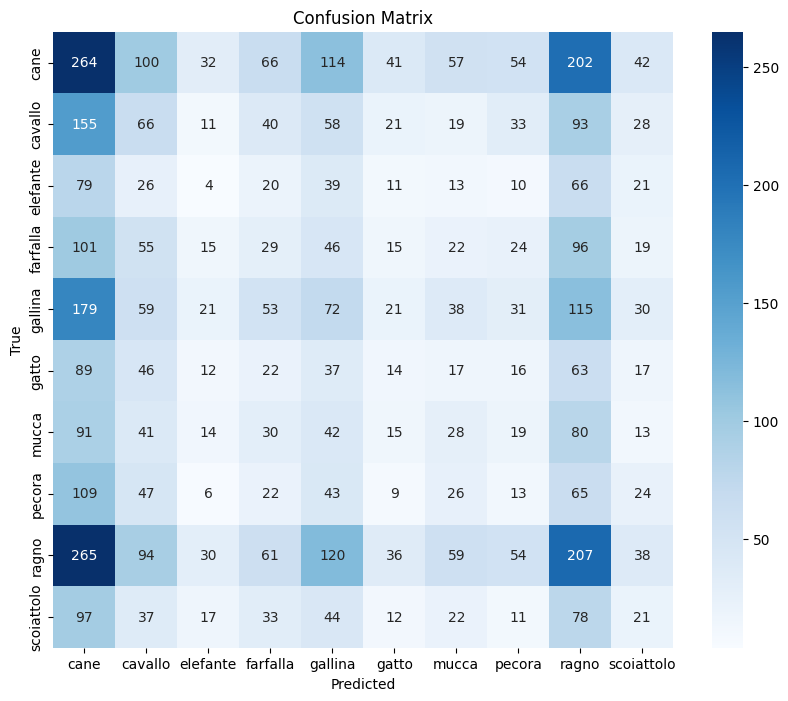

              precision    recall  f1-score   support

        cane       0.18      0.27      0.22       972
     cavallo       0.12      0.13      0.12       524
    elefante       0.02      0.01      0.02       289
    farfalla       0.08      0.07      0.07       422
     gallina       0.12      0.12      0.12       619
       gatto       0.07      0.04      0.05       333
       mucca       0.09      0.08      0.08       373
      pecora       0.05      0.04      0.04       364
       ragno       0.19      0.21      0.20       964
  scoiattolo       0.08      0.06      0.07       372

    accuracy                           0.14      5232
   macro avg       0.10      0.10      0.10      5232
weighted avg       0.12      0.14      0.13      5232



In [ ]:
# EVALUASI MODEL

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict pada validation data
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print(classification_report(val_generator.classes, y_pred, target_names=val_generator.class_indices.keys()))

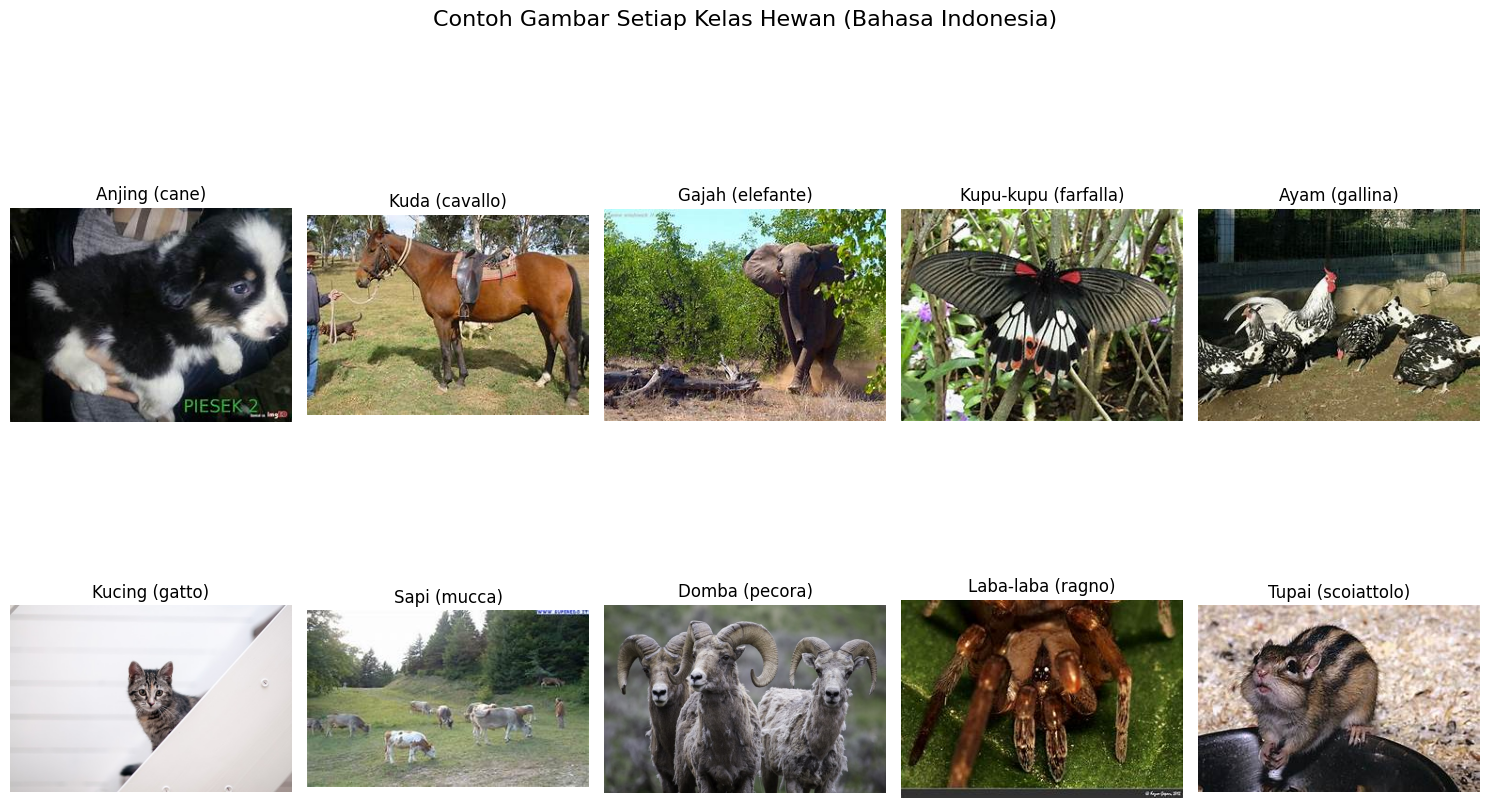

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

data_dir = '/content/animals10/raw-img'

# Label asli ke Bahasa Indonesia
translate_labels = {
    "cane": "Anjing",
    "cavallo": "Kuda",
    "elefante": "Gajah",
    "farfalla": "Kupu-kupu",
    "gallina": "Ayam",
    "gatto": "Kucing",
    "mucca": "Sapi",
    "pecora": "Domba",
    "ragno": "Laba-laba",
    "scoiattolo": "Tupai"
}

# Tampilkan gambar dari tiap kelas
plt.figure(figsize=(15, 10))
for i, (folder, indo_label) in enumerate(translate_labels.items()):
    folder_path = os.path.join(dataset_path, folder)
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not files:
        continue
    img_path = os.path.join(folder_path, files[0])
    img = mpimg.imread(img_path)

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"{indo_label} ({folder})")
    plt.axis('off')

plt.suptitle("Contoh Gambar Setiap Kelas Hewan (Bahasa Indonesia)", fontsize=16)
plt.tight_layout()
plt.show()
